---

Analisis Exploratorio de Datos
---
El objetivo de este EDA es estudiar y conocer los datos para proponer un modelo de ML en una recomendación de peliculas

De igual forma, establecer culaes son las columnas de datos idoneas para el modelo de entrenamiento.

Se cargan las librerias que se utilizaran para realizar el EDA

In [21]:
# ------------------------------------------------------------------------------------------------------------------------------
                                                        #Librerias
# ------------------------------------------------------------------------------------------------------------------------------
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

---
Carga de los datos a un dataframe

In [22]:
# Dataframe de los datos cargados, ese archivo ya fue porocesado previamente por el algoritmo ETL
df = pd.read_parquet("../Data/dataset_movies.parquet")

---

¿como estan organizados lo datos? Se da una reviación general a los primeros 5 datos del df

In [23]:
# Imprime las primeras 5 filas
df.head(5)

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,...,runtime,spoken_languages,status,title,vote_average,vote_count,release_year,return,director,actor_names
0,[Toy Story Collection],30000000,"[Animation, Comedy, Family]",862,en,"Led by Woody, Andy's toys live happily in his ...",21.95,[Pixar Animation Studios],[United States of America],1995-10-30,...,81.00,[English],Released,Toy Story,7.70,5415,1995,12.45,[John Lasseter],"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney..."
1,[],65000000,"[Adventure, Fantasy, Family]",8844,en,When siblings Judy and Peter discover an encha...,17.02,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],1995-12-15,...,104.00,"[English, Français]",Released,Jumanji,6.90,2413,1995,4.04,[Joe Johnston],"[Robin Williams, Jonathan Hyde, Kirsten Dunst,..."
2,[Grumpy Old Men Collection],0,"[Romance, Comedy]",15602,en,A family wedding reignites the ancient feud be...,11.71,"[Warner Bros., Lancaster Gate]",[United States of America],1995-12-22,...,101.00,[English],Released,Grumpier Old Men,6.50,92,1995,0.00,[Howard Deutch],"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop..."
3,[],16000000,"[Comedy, Drama, Romance]",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.86,[Twentieth Century Fox Film Corporation],[United States of America],1995-12-22,...,127.00,[English],Released,Waiting to Exhale,6.10,34,1995,5.09,[Forest Whitaker],"[Whitney Houston, Angela Bassett, Loretta Devi..."
4,[Father of the Bride Collection],0,[Comedy],11862,en,Just when George Banks has recovered from his ...,8.39,"[Sandollar Productions, Touchstone Pictures]",[United States of America],1995-02-10,...,106.00,[English],Released,Father of the Bride Part II,5.70,173,1995,0.00,[Charles Shyer],"[Steve Martin, Diane Keaton, Martin Short, Kim..."


---
Estructura de Datos
--- 

Visualizacion de la estructura de los datos para revisar los tipos de datos que tiene el dataset y los valores faltantes

Se observa que existen datos de tipo numerco, flotante, datetime y cadenas de texto

Ademas, las columnas original_language, overview, runtime y status tiene datos faltantes, todos ellos variables tipo object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45454 entries, 0 to 45453
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   belongs_to_collection  45454 non-null  object        
 1   budget                 45454 non-null  int64         
 2   genres                 45454 non-null  object        
 3   id                     45454 non-null  int64         
 4   original_language      45443 non-null  object        
 5   overview               44513 non-null  object        
 6   popularity             45454 non-null  float64       
 7   production_companies   45454 non-null  object        
 8   production_countries   45454 non-null  object        
 9   release_date           45454 non-null  datetime64[ns]
 10  revenue                45454 non-null  int64         
 11  runtime                45208 non-null  float64       
 12  spoken_languages       45454 non-null  object        
 13  s

---
Distribución de las variables cuantitativas
---

Este paso es utilizado para obtener estadisticas descriptivas como la media, mediana, moda, desviacion y cuartiles de las variables numéricas

In [4]:
# se da formato a los datos flotantes para que aparezcan con solo 2 decimales
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe()

,budget,id,popularity,release_date,revenue,runtime,vote_average,vote_count,release_year,return
count,45454.00,45454.00,45454.00,45454,45454.00,45208.00,45454.00,45454.00,45454.00,45454.00
mean,4231014.80,107987.47,2.93,1992-05-16 09:25:27.786333440,11218557.26,94.18,5.62,109.98,1991.88,658.91
min,0.00,2.00,0.00,1874-12-09 00:00:00,0.00,0.00,0.00,0.00,1874.00,0.00
25%,0.00,26368.25,0.39,1978-10-08 06:00:00,0.00,85.00,5.00,3.00,1978.00,0.00
50%,0.00,59877.00,1.13,2001-09-01 12:00:00,0.00,95.00,6.00,10.00,2001.00,0.00
75%,0.00,156328.25,3.69,2010-12-16 18:00:00,0.00,107.00,6.80,34.00,2010.00,0.00
max,380000000.00,469172.00,547.49,2020-12-16 00:00:00,2787965087.00,1256.00,10.00,14075.00,2020.00,12396383.00
std,17428874.03,112109.68,6.01,NaN,64337783.60,38.33,1.92,491.34,24.06,74629.18


Observaciones: 
1. Se puede notar que las variables budget (presupuesto) existe un sesgo negativo o hacia la izquierda
2. De igual forma, en la columna revenue (ganacia) también existe un sesgo negativo o hacia la izquierda
3. En la columna popularity (popularidad) los datos se encuentran sesgados a la derecha o presentan un 
    sesgo negativo por lo que puede existir presencia de outliers
4. En vote average (promedio de la votación) presenta una buena distribución de datos
5. En vote_count existe un sesgo hacia la izquierda
6. En la columna return tambien existe sesgo hacia la derecha

Conclusiones:
    En general los datos numéricos se encuentran sesgados a la derecha o presentan sesgo positivo, esto podria ser por que las ultimas 
    peliculas capturadas en la DB tiene mayor informacion que las anteriores, mientras que las peliculas anteriores presentan información incompleta

---

Analisis de variables cuantitativas
---

El objetivo de este analisis es poder encontrar valores atípicos, nulos o faltantes en cada una de las columnas, 
de igual forma comprender la distribuciond e los mismos

Columna Budget (presupuesto)
---

In [6]:
nom_col = 'budget'
df[nom_col].describe()

count       45454.00
mean      4231014.80
std      17428874.03
min             0.00
25%             0.00
50%             0.00
75%             0.00
max     380000000.00
Name: budget, dtype: float64

In [7]:
df[nom_col].value_counts()

budget
0            36546
5000000        286
10000000       261
20000000       243
2000000        242
             ...  
270000000        1
923              1
72500000         1
2160000          1
1254040          1
Name: count, Length: 1223, dtype: int64

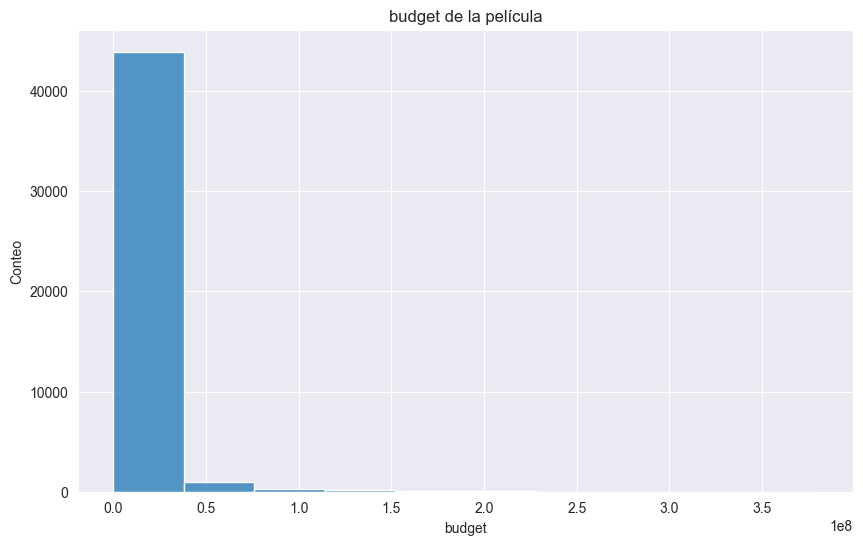

In [8]:
#Tema para gráficos de seaborn
sns.set_style('darkgrid')
# Visualizar la distribucion de los datos
fig, ax = plt.subplots(figsize = (10,6))
sns.histplot(data = df, x = nom_col, bins=10)
plt.title(f"{nom_col} de la película")
plt.xlabel(nom_col)
plt.ylabel("Conteo")
plt.show()

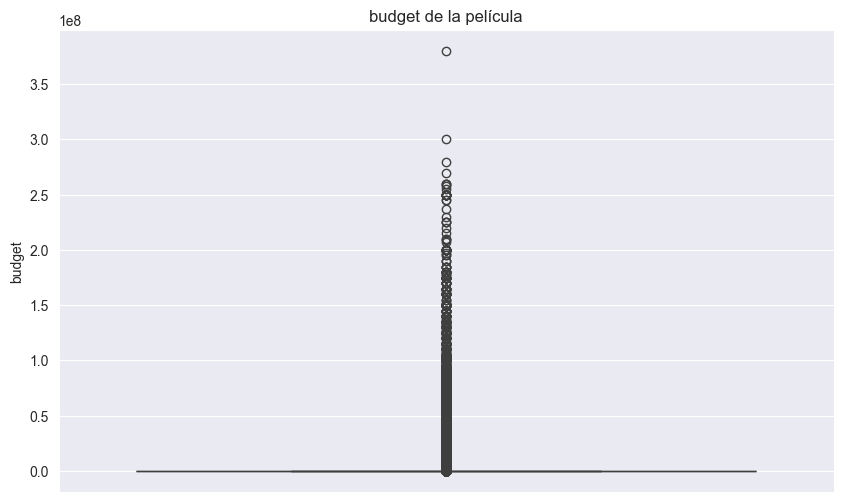

In [9]:
# Identificar outliers con boxplot
fig, ax = plt.subplots(figsize = (10, 6))
sns.boxplot(data= df, y = df.budget)
plt.title(f"{nom_col} de la película")
plt.xlabel('')
plt.show()

En este gráfico se observan que los datos en su mayoría se encuentran con el valor 0, detectando demasiados outliers,
por lo que no existe buena variabilidad de los datos, por esta razón no se puede observar la caja de datos

Observaciones:
---
Como ya se habia mencionado existe un sesgo a la derecha de los datos, también se puede apreciar que existe una mayor cantidad
de datos con el valor 0, con mas del 70% de los datos por lo que no es una buena columna para aplicar el modelo de ML

---


Columna revenue (ganancia)
---

In [10]:
#Nombre de la columna a 
nom_col = 'revenue'
df[nom_col].describe()

count        45454.00
mean      11218557.26
std       64337783.60
min              0.00
25%              0.00
50%              0.00
75%              0.00
max     2787965087.00
Name: revenue, dtype: float64

In [11]:
df[nom_col].value_counts()

revenue
0           38027
12000000       20
11000000       19
10000000       19
2000000        18
            ...  
36565280        1
439564          1
35610100        1
10217873        1
1413000         1
Name: count, Length: 6863, dtype: int64

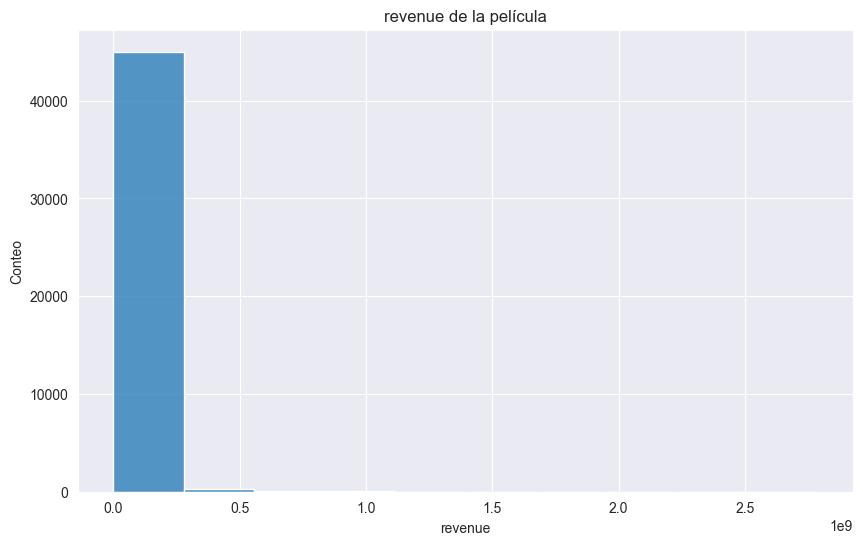

In [12]:
#Tema para gráficos de seaborn
sns.set_style('darkgrid')
# Visualizar la distribucion de los datos
fig, ax = plt.subplots(figsize = (10,6))
sns.histplot(data = df, x = nom_col, bins=10)
plt.title(f"{nom_col} de la película")
plt.xlabel(nom_col)
plt.ylabel("Conteo")
plt.show()

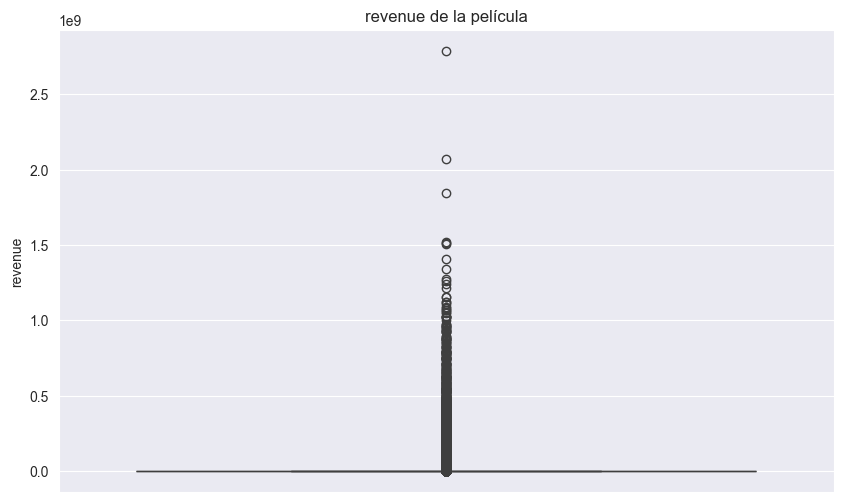

In [13]:
# Identificar outliers con boxplot
fig, ax = plt.subplots(figsize = (10, 6))
sns.boxplot(data= df, y = df.revenue)
plt.title(f"{nom_col} de la película")
plt.xlabel('')
plt.show()

Observaciones:
---

Se logra percibir la misma situación de la variable budget(presupuesto), pues los datos estan cargados a la izquierda,
por está razón llegamos a la misma conclusión que la variable anterior y no es posible utilizar la variable dentro del modelo 
de ML.


---
Columna Popularity (Polpularidad de la película)
---



Esta columna muestra informacion sobre la popularidad que ha tenido  una pelicula con la audiencia

In [14]:
nom_col = 'popularity'
df[nom_col].describe()

count   45454.00
mean        2.93
std         6.01
min         0.00
25%         0.39
50%         1.13
75%         3.69
max       547.49
Name: popularity, dtype: float64

In [15]:
# Debido a que no se pueden apreciar las diferencias, se cambia los decimales a observar
pd.set_option('display.float_format', '{:.10f}'.format)
df[nom_col].value_counts()

popularity
0.0000010000    56
0.0003080000    42
0.0000000000    40
0.0002200000    39
0.0005780000    38
                ..
0.5562920000     1
0.9141330000     1
0.8588360000     1
4.7471970000     1
0.1630150000     1
Name: count, Length: 43733, dtype: int64

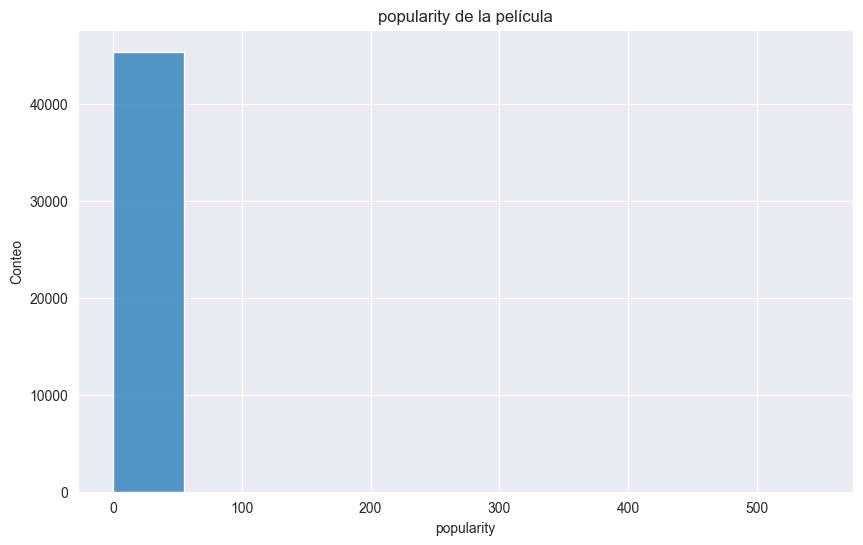

In [16]:
#Tema para gráficos de seaborn
sns.set_style('darkgrid')
# Visualizar la distribucion de los datos
fig, ax = plt.subplots(figsize = (10,6))
sns.histplot(data = df, x = nom_col, bins=10)
plt.title(f"{nom_col} de la película")
plt.xlabel(nom_col)
plt.ylabel("Conteo")
plt.show()

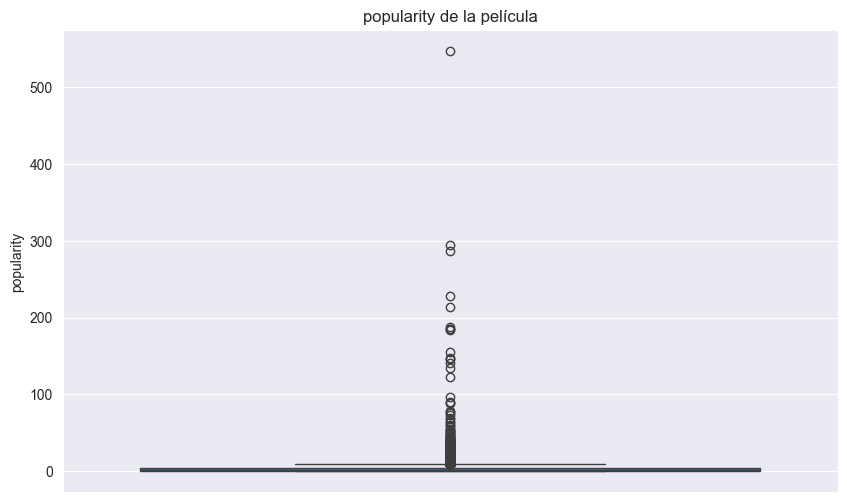

In [17]:
# Identificar outliers con boxplot
fig, ax = plt.subplots(figsize = (10, 6))
sns.boxplot(data= df, y = df.popularity)
plt.title(f"{nom_col} de la película")
plt.xlabel('')
plt.show()

¿Cómo se distribuyen los datos?

In [18]:
# Peliculas en todo el dataset que tuvieron un porcentaje de popularidad mayor al 50%
conteo = df[df['popularity'] > 50]['popularity'].count()
print(f'Total de peliculas mayores a 50% de popularidad: {conteo}')
print(f'Porcentaje {round(conteo/len(df),4)}%')

Total de peliculas mayores a 50% de popularidad: 37
Porcentaje 0.0008%


In [19]:
# Peliculas en todo el dataset que tuvieron un porcentaje de popularidad mayor al 30% pero menor que 50%
conteo = df[(df['popularity'] < 50) & (df['popularity'] > 25)]['popularity'].count()
print(f'Total de peliculas entre 25 y 50% de popularidad: {conteo}')
print(f'Porcentaje {round(conteo/len(df),4)}%')

Total de peliculas entre 25 y 50% de popularidad: 120
Porcentaje 0.0026%


In [20]:
# Peliculas en todo el dataset que tuvieron un porcentaje de popularidad mayor al 5% pero menor al 20
conteo = df[(df['popularity'] < 25) & (df['popularity'] > 5)]['popularity'].count()
print(f'Total de peliculas entre 5 y 25 de popularidad: {conteo}')
print(f'Porcentaje {round(conteo/len(df),4)} %')

Total de peliculas entre 5 y 25 de popularidad: 9006
Porcentaje 0.1981 %


In [21]:
# Peliculas en todo el dataset que tuvieron un porcentaje de popularidad mayor al 0% pero menor al 5
conteo = df[(df['popularity'] < 5) & (df['popularity'] > 0)]['popularity'].count()
print(f'Total de peliculas entre 0 y 5% de popularidad: {conteo}')
print(f'Porcentaje {round(conteo/len(df),4)} %')

Total de peliculas entre 0 y 5% de popularidad: 36251
Porcentaje 0.7975 %


In [22]:
# Peliculas en todo el dataset que tuvieron un porcentaje de popularidad mayor al 5% pero menor al 20
conteo = df[df['popularity'] == 0]['popularity'].count()
print(f'Total de peliculas con 0% de popularidad: {conteo}')
print(f'Porcentaje {round(conteo/len(df),4)} %')

Total de peliculas con 0% de popularidad: 40
Porcentaje 0.0009 %


In [23]:
# La mayor parte de datos 79% se encuentra entre 0 y 5% de popularidad
rango_0_5 = df[(df['popularity'] < 5) & (df['popularity'] > 0)][['popularity','title','release_year']]
rango_0_5

,popularity,title,release_year
3,3.8594950000,Waiting to Exhale,1995
7,2.5611610000,Tom and Huck,1995
25,1.8458990000,Othello,1995
27,2.2284340000,Persuasion,1995
29,1.1009150000,Shanghai Triad,1995
...,...,...,...
45448,0.6615580000,Caged Heat 3000,1995
45450,0.1782410000,Century of Birthing,2011
45451,0.9030070000,Betrayal,2003
45452,0.0035030000,Satan Triumphant,1917


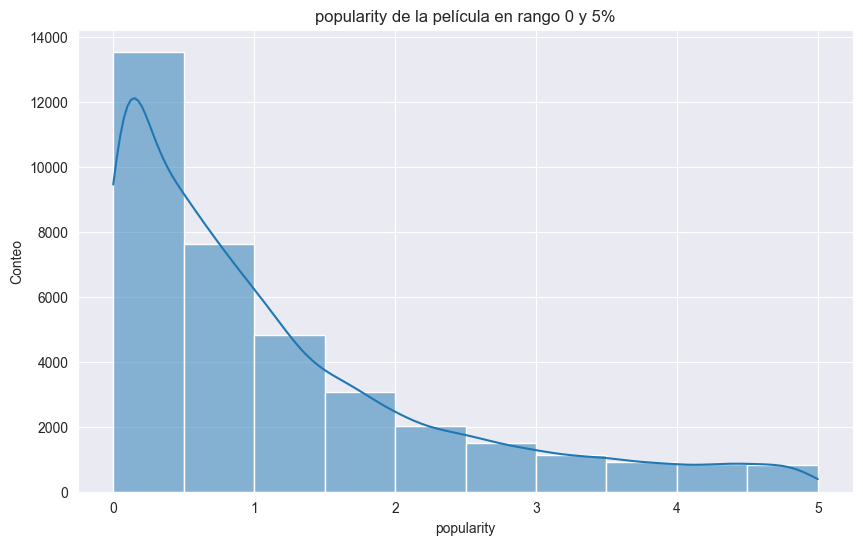

In [24]:
#Tema para gráficos de seaborn
sns.set_style('darkgrid')
# Visualizar la distribucion de los datos
nom_col = 'popularity'
fig, ax = plt.subplots(figsize = (10,6))
sns.histplot(data = rango_0_5, kde=True, x = nom_col, bins=10)
plt.title(f"{nom_col} de la película en rango 0 y 5%")
plt.xlabel(nom_col)
plt.ylabel("Conteo")
plt.show()

Observaciones: 
---
Se analizaron los datos a detalle dvidiendo los datos por rangos y se encontro que: los datos se encuentran sesgados a la derecha, 
es decir la matoria de datos esta en un solo lado del gráfico como se aprecia en el gráfico de barras. Por esta razón, no es recomendable 
realizar un modelo de recomendación utilizando esta columna, no obstante la columna de popularidad puede otorgar características adiconales
para la recomendación, por ejemplo 1 de cada 50 recomendaciones, realizarla mediante popularidad.

--- -

---
Columna Return (Retorno de la película)
---

In [25]:
#Nombre de la columna a 
nom_col = 'return'
df[nom_col].describe()

count      45454.0000000000
mean         658.9125898711
std        74629.1824285671
min            0.0000000000
25%            0.0000000000
50%            0.0000000000
75%            0.0000000000
max     12396383.0000000000
Name: return, dtype: float64

In [26]:
df[nom_col].value_counts()

return
0.0000000000     40133
0.0100000000        64
0.0200000000        38
1.0000000000        34
0.0800000000        29
                 ...  
7.3300000000         1
22.5000000000        1
14.9600000000        1
7.8700000000         1
16.8000000000        1
Name: count, Length: 1256, dtype: int64

La mayoria de valores de retorno se encuentran en el cero

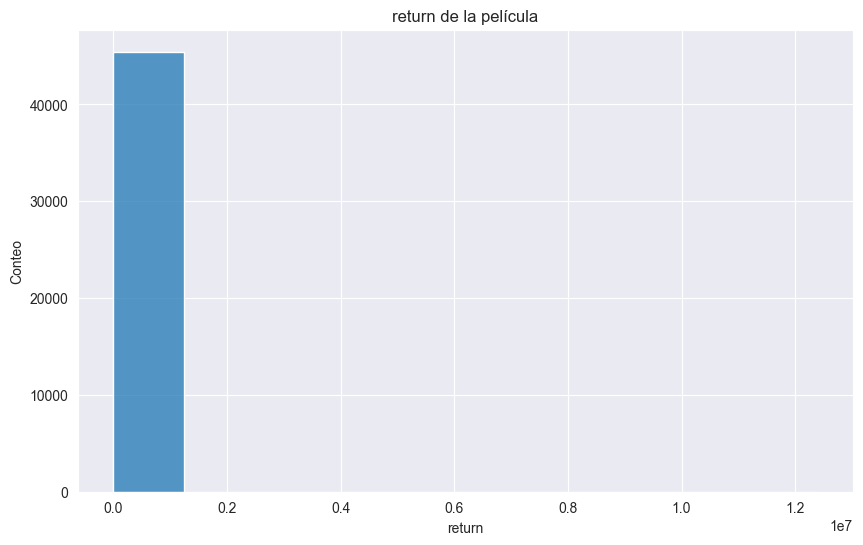

In [27]:
#Tema para gráficos de seaborn
sns.set_style('darkgrid')
# Visualizar la distribucion de los datos
fig, ax = plt.subplots(figsize = (10,6))
sns.histplot(data = df, x = nom_col, bins=10)
plt.title(f"{nom_col} de la película")
plt.xlabel(nom_col)
plt.ylabel("Conteo")
plt.show()

In [28]:
# Peliculas en todo el dataset que tuvieron un porcentaje de popularidad mayor al 0% pero menor al 5
conteo = df[(df['return'] < 5) & (df['return'] > 0)]['return'].count()
print(f'Total de peliculas entre 0 y 5% de return: {conteo}')
print(f'Porcentaje {round(conteo/len(df),4)} %')

Total de peliculas entre 0 y 5% de return: 4206
Porcentaje 0.0925 %


In [29]:
# Peliculas en todo el dataset que tuvieron un porcentaje de popularidad mayor al 5% pero menor al 20
conteo0 = df[df['return'] == 0]['return'].count()
print(f'Total de peliculas con 0% de return: {conteo}')
print(f'Porcentaje {round(conteo/len(df),4)} %')

Total de peliculas con 0% de return: 4206
Porcentaje 0.0925 %


In [30]:
# La mayor parte de datos 79% se encuentra entre 0 y 5 de popularidad
rango_0_10 = df[(df['return'] < 10) & (df['return'] > 0)][['return','title','release_year']]
rango_0_10

,return,title,release_year
1,4.0400000000,Jumanji,1995
3,5.0900000000,Waiting to Exhale,1995
5,3.1200000000,Heat,1995
8,1.8400000000,Sudden Death,1995
9,6.0700000000,GoldenEye,1995
...,...,...,...
45053,1.3400000000,The Adventures of Prince Florisel,1979
45160,1.5800000000,They're a Weird Mob,1966
45318,1.6600000000,The Jazz Loft According to W. Eugene Smith,2016
45320,0.6300000000,13 Moons,2002


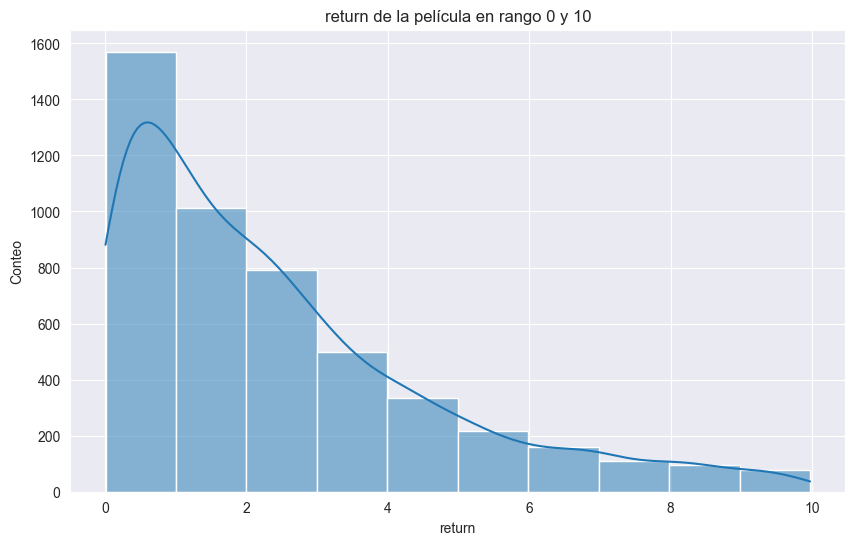

In [31]:
#Tema para gráficos de seaborn
sns.set_style('darkgrid')
# Visualizar la distribucion de los datos
nom_col = 'return'

fig, ax = plt.subplots(figsize = (10,6))
sns.histplot(data = rango_0_5, kde=True, x = rango_0_10['return'], bins=10)
plt.title(f"{nom_col} de la película en rango 0 y 10")
plt.xlabel(nom_col)
plt.ylabel("Conteo")
plt.show()

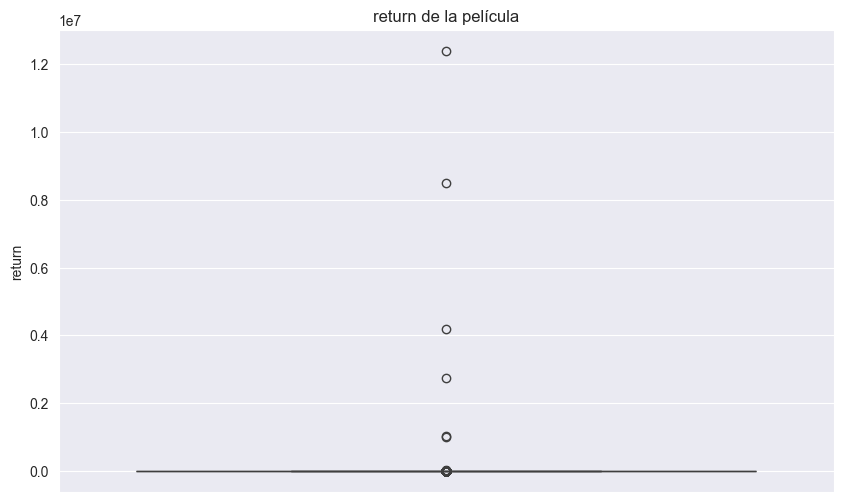

In [32]:
# Identificar outliers con boxplot
fig, ax = plt.subplots(figsize = (10, 6))
sns.boxplot(data= df, y = df['return'])
plt.title(f"{nom_col} de la película")
plt.xlabel('')
plt.show()

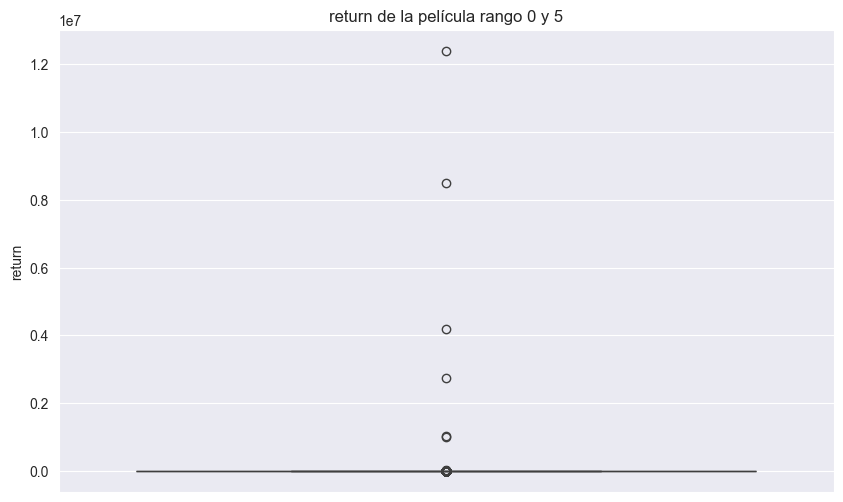

In [33]:
# Identificar outliers con boxplot
fig, ax = plt.subplots(figsize = (10, 6))
sns.boxplot(data= rango_0_10, y = df['return'])
plt.title(f"{nom_col} de la película rango 0 y 5")
plt.xlabel('')
plt.show()

Observaciones: 
---
Se analizaron los datos a detalle dvidiendo los datos por rangos y se encontro que: los datos se encuentran sesgados a la derecha, 
es decir la mayoria de datos esta en un solo lado del gráfico como se aprecia en el gráfico de barras. Por esta razón, no es recomendable 
realizar un modelo de recomendación utilizando esta columna. Sin embar, al igual que la variable anterior podría suponer una carateristica adicionañ

--- -

---
Columna vote_average (Promedio de votacion)
---

In [34]:
#Nombre de la columna a 
nom_col = 'vote_average'
df[nom_col].describe()

count   45454.0000000000
mean        5.6240946891
std         1.9153827264
min         0.0000000000
25%         5.0000000000
50%         6.0000000000
75%         6.8000000000
max        10.0000000000
Name: vote_average, dtype: float64

Aqui se pueden observar que los datos se encuentran distribuidos casi al centro, por lo que presentan una distribución normal casi perfecta. 

In [35]:
df[nom_col].value_counts()

vote_average
0.0000000000    2953
6.0000000000    2466
5.0000000000    2006
7.0000000000    1886
6.5000000000    1722
                ... 
9.1000000000       2
9.6000000000       1
9.8000000000       1
0.7000000000       1
1.1000000000       1
Name: count, Length: 92, dtype: int64

de igual forma la mayoria de las votaciones presentan un valor igual a cero

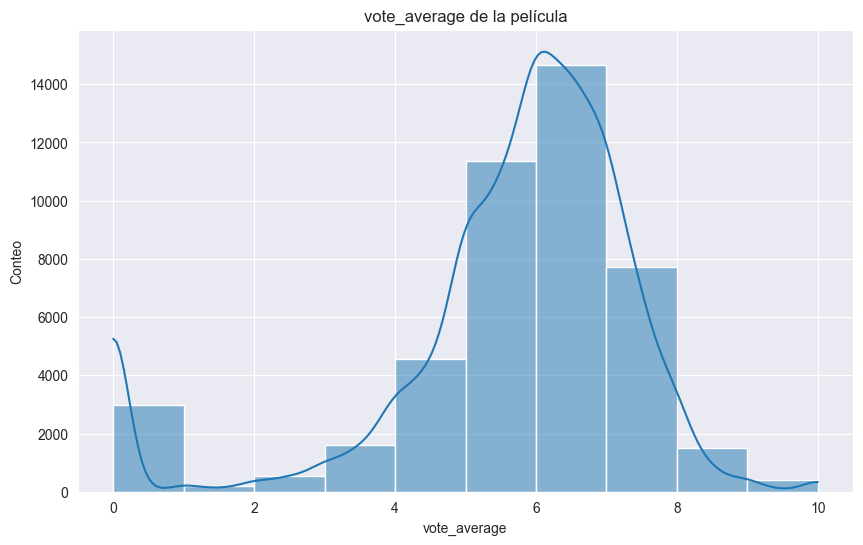

In [36]:
#Tema para gráficos de seaborn
sns.set_style('darkgrid')
# Visualizar la distribucion de los datos
fig, ax = plt.subplots(figsize = (10,6))
sns.histplot(df[nom_col], kde=True, bins=10)
plt.title(f"{nom_col} de la película")
plt.xlabel(nom_col)
plt.ylabel("Conteo")
plt.show()

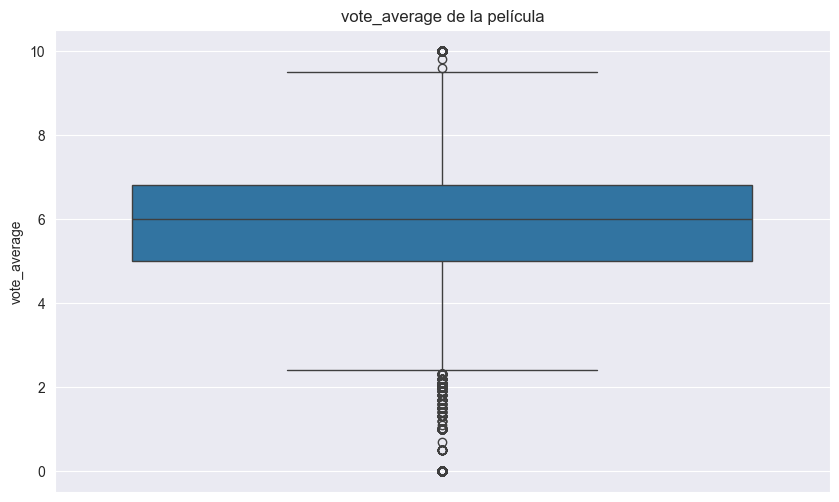

In [37]:
# Identificar outliers con boxplot
fig, ax = plt.subplots(figsize = (10, 6))
sns.boxplot(data= df, y = df.vote_average)
plt.title(f"{nom_col} de la película")
plt.xlabel('')
plt.show()

Aunque existen varios outliers, los datos de esta columna se encuentran muy bien estructurados y distribuidos, pueden ser una muy buena opción para 
el modelo de recomendación de ML
Dado que los usuarios proporcionan su vatoacion y este valor es el promedio de cada una de las peliculas, la columna puede ser una muy buena opcion 
ya que cada usuario desde su perspectiva aporta una votación a cada filmación, con ello se puede armar un sistema de recomendación para otros usuarios, 
sin embargo, es de suponerse que no estaría completo ya que no todos los usuarios tiene los mismos gustos. 
Pudiendo ser que en complemento con otras variables se den recomendaciones mucho más perecias.


---
Columna vote_count (Promedio de votacion)
---

In [38]:
#Nombre de la columna a analizar
nom_col = 'vote_count'
df[nom_col].describe()

count   45454.0000000000
mean      109.9832137986
std       491.3367749501
min         0.0000000000
25%         3.0000000000
50%        10.0000000000
75%        34.0000000000
max     14075.0000000000
Name: vote_count, dtype: float64

In [39]:
df[nom_col].value_counts()

vote_count
1       3247
2       3128
0       2855
3       2797
4       2480
        ... 
2755       1
1187       1
4200       1
3322       1
2712       1
Name: count, Length: 1820, dtype: int64

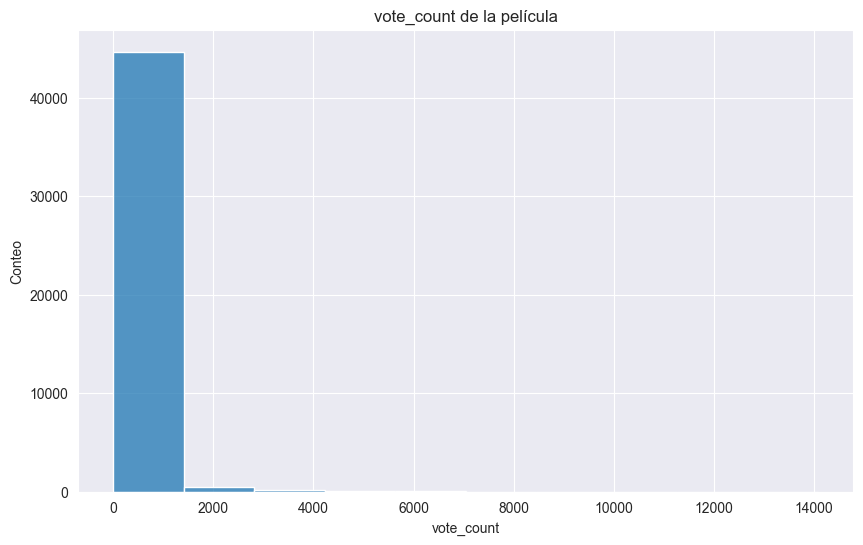

In [40]:
#Tema para gráficos de seaborn
sns.set_style('darkgrid')
# Visualizar la distribucion de los datos
fig, ax = plt.subplots(figsize = (10,6))
sns.histplot(df[nom_col], bins=10)
plt.title(f"{nom_col} de la película")
plt.xlabel(nom_col)
plt.ylabel("Conteo")
plt.show()

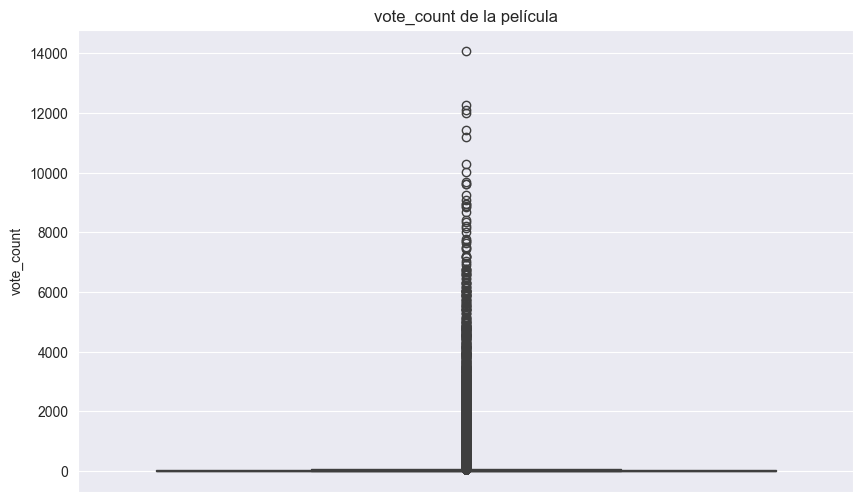

In [41]:
# Identificar outliers con boxplot
fig, ax = plt.subplots(figsize = (10, 6))
sns.boxplot(data= df, y = df[nom_col])
plt.title(f"{nom_col} de la película")
plt.xlabel('')
plt.show()

In [42]:
# La mayor parte de datos 79% se encuentra entre 0 y 5 de popularidad
rango_0_10 = df[(df[nom_col] < 10) & (df[nom_col] > 0)][[nom_col,'title','release_year']]
rango_0_10

,vote_count,title,release_year
32,4,Wings of Courage,1996
36,2,Across the Sea of Time,1995
50,3,Guardian Angel,1994
55,1,Kids of the Round Table,1997
58,2,The Confessional,1995
...,...,...,...
45446,2,Shadow of the Blair Witch,2000
45447,1,The Burkittsville 7,2000
45448,1,Caged Heat 3000,1995
45450,3,Century of Birthing,2011


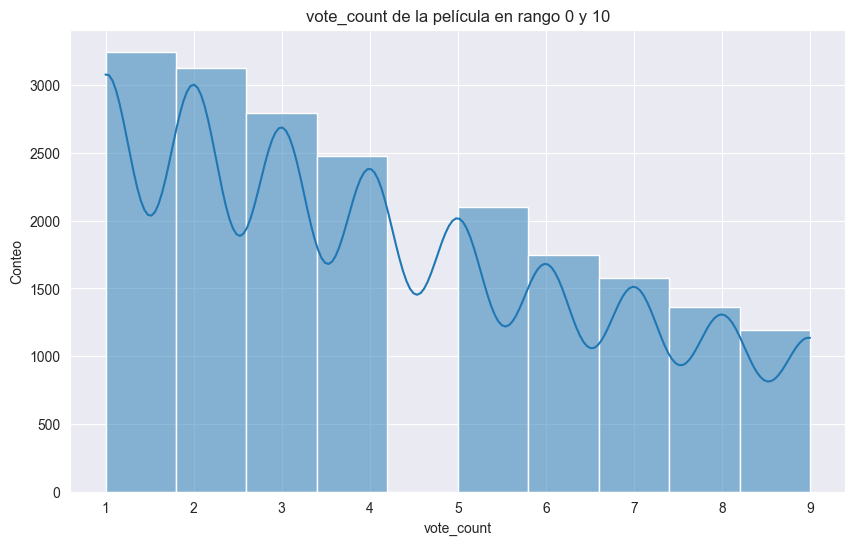

In [43]:
#Tema para gráficos de seaborn
sns.set_style('darkgrid')
# Visualizar la distribucion de los datos
nom_col = 'vote_count'

fig, ax = plt.subplots(figsize = (10,6))
sns.histplot(data = df, kde=True, x = rango_0_10[nom_col], bins=10)
plt.title(f"{nom_col} de la película en rango 0 y 10")
plt.xlabel(nom_col)
plt.ylabel("Conteo")
plt.show()

Mismo caso que las variables anteriores, se encuentran datos con poca distribución sesgados a la derecha,
por esta razón vote_count no es una variable pertienente para el uso en el sistema de recomendación de ML



--- 

---
Columnas con variables categóricas
---
---

Una columna importante a analizar para las variables categóricas es el genero de las películas

In [24]:
# Con la finalidad de evitar perdida de datos se crea una copia del dataframe puesto que se transformaraán datos
df_transformed = df.copy()

In [45]:
nom_col = 'genres'
df_transformed[nom_col]

0         [Animation, Comedy, Family]
1        [Adventure, Fantasy, Family]
2                   [Romance, Comedy]
3            [Comedy, Drama, Romance]
4                            [Comedy]
                     ...             
45449        [Drama, Action, Romance]
45450                         [Drama]
45451       [Action, Drama, Thriller]
45452                              []
45453                              []
Name: genres, Length: 45454, dtype: object

In [46]:
df_transformed[nom_col].info()

<class 'pandas.core.series.Series'>
RangeIndex: 45454 entries, 0 to 45453
Series name: genres
Non-Null Count  Dtype 
--------------  ----- 
45454 non-null  object
dtypes: object(1)
memory usage: 355.2+ KB


In [47]:
# Filas nulas
print( f'Filas nulas en la columna: {df_transformed[nom_col].isnull().sum()}')

Filas nulas en la columna: 0


funcion de apoyo

In [48]:
def obtener_unicos(df):
    """
        Función que entrega valores separados y unicos de un dataframe que contiene
        una columna de listas. esta función, funciona cuando se llama la función 
        frecuencia_en_columna()
            Parametros: 
                df: dataframe donde obtendra unicos
    """
    #Lista vacia que contendrá los generos unicos sin repeticion de todo el dataset
    unicos = []
    data_separada = []
    # ciclo que recorre cada fila y cada lista que esta en cada fila, al final agrega el dato a a lista
    for lista in df:
        for dato in lista:
            data_separada.append(dato)
    # Con set se especifica que no se repitan los valores en la lista y se vuelve a convertir a lista
    unicos = list(set(data_separada))
    return (data_separada, unicos)

funcion de apoyo

In [49]:
# funcion para limpiar columnas de datos o listas vacias '[]'. Servira para otras columnas que tiene datos similares
def frecuencia_en_columna (df, nombre_columna):
    """
    Filtra un DataFrame para mantener solo las filas donde la columna especificada
    no tenga valores nulos y, si contiene listas, que no estén vacías.

    Parameters:
        DataFrame: El DataFrame a filtrar.
        column_name (str): El nombre de la columna a verificar.

    Returns:
        DataFrame: DataFrame con frecuencia de datos en columna.
        dictionary: diccionario con frecuencia de columna separada.
    """
    df = df[nombre_columna][df[nombre_columna].apply(lambda x: x is not None and len(x) > 0)]
    separados, unicos = obtener_unicos(df)
    # Dcicionario vacio que contendrá los datos unicos y su conteo
    dictionary = {}
    for dato in unicos:
        count = 0
        for datos in separados:
            if dato in datos:
                count += 1
        dictionary[dato] = count
    # Se convierte el diccionario a un dataframe
    df_unicos_y_repetidos = pd.Series(dictionary)

    #retorna el dataframe 
    return df_unicos_y_repetidos, dictionary

In [50]:
import re
# Funcion optimizada
def obtener_unicos_opt(df):
    """
    Función que entrega valores separados y únicos de un DataFrame que contiene
    una columna de listas. Esta función se usa cuando se llama la función 
    frecuencia_en_columna().
    
    Parámetros:
        df: DataFrame donde se obtendrán los valores únicos.
    
    Retorna:
        Lista de datos separados y lista de datos únicos.
    """
    # Aplanar las listas en la columna y obtener los valores únicos
    # Usar regex para encontrar todos los nombres en la columna dada
    data_separada = df.apply(lambda x: re.findall(r'[^,]+', ','.join(x))).explode().tolist()
    unicos = list(set(data_separada))
    return data_separada, unicos

In [51]:
# Función optimizada
def frecuencia_en_columna_opt(df, nombre_columna):
    """
    Filtra un DataFrame para mantener solo las filas donde la columna especificada
    no tenga valores nulos y, si contiene listas, que no estén vacías.

    Parámetros:
        df: DataFrame a filtrar.
        nombre_columna (str): Nombre de la columna a verificar.

    Retorna:
        DataFrame con frecuencia de datos en columna.
        Diccionario con frecuencia de columna separada.
    """
    # Filtrar filas con listas no vacías
    df_filtrado = df[nombre_columna].dropna().apply(lambda x: x if len(x) > 0 else None).dropna()
    
    # Obtener valores separados y únicos
    data_separada, unicos = obtener_unicos_opt(df_filtrado)

    # Contar frecuencia de cada valor único
    dictionary = {dato: data_separada.count(dato) for dato in unicos}
    
    # Convertir el diccionario a un DataFrame
    df_unicos_y_repetidos = pd.Series(dictionary)
    
    return df_unicos_y_repetidos, dictionary

In [52]:
# Separa los datos de generos y ademas entrega los unicos, sin repreticion
df_frecuencia, dictionary = frecuencia_en_columna(df_transformed, 'genres')

C:\Users\Usuario\AppData\Local\Temp\ipykernel_2968\962845474.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_frecuencia.values, y=df_frecuencia.index, palette=paleta)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_2968\962845474.py:6: UserWarning: 
The palette list has fewer values (10) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=df_frecuencia.values, y=df_frecuencia.index, palette=paleta)


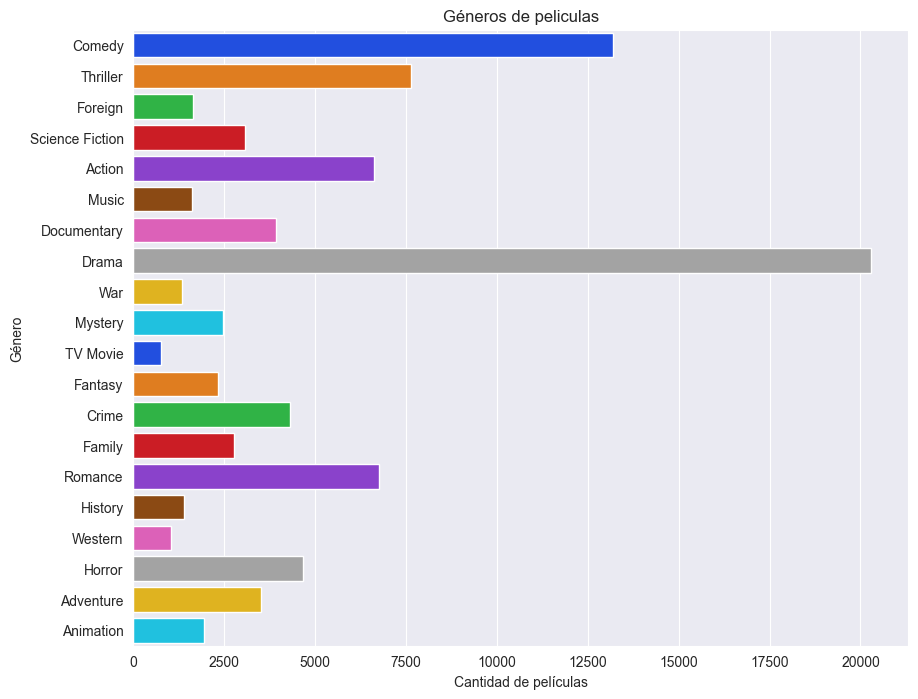

In [53]:
# Gráfico de barras para mostrar la distribución de géneros
# Crear una paleta de colores pasteles personalizada
paleta = sns.color_palette('bright')
# paleta = sns.color_palette("Spectral")
plt.figure(figsize=(10, 8))
sns.barplot(x=df_frecuencia.values, y=df_frecuencia.index, palette=paleta)
plt.xlabel('Cantidad de películas')
plt.ylabel('Género')
plt.title('Géneros de peliculas')
plt.show()
     

In [54]:
# Libreria para nubes de palabras
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

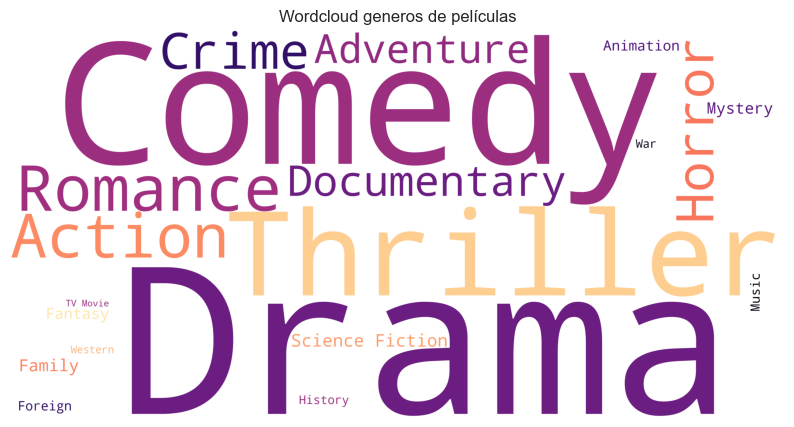

In [55]:
# Generar la nube de palabras con todos los géneros
wordcloud = WordCloud(background_color='white', height=2000, width=4000, colormap='magma').generate_from_frequencies(dictionary)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Wordcloud generos de películas')
plt.show()

La columna generos es muy importante para el sistema de recomendación ya que gracias al genero de la pelicula, 
se pueden generar recomendaciones a partir de peliculas que comparten está característica, por lo que es una columna que 
se utilizará para el Modelo ML

---
Variable Production Companies
---

Columna que contiene informacion sobre las compañias de produccion 

In [56]:
nom_col = 'production_companies'

In [57]:
df_transformed[nom_col]

0                                [Pixar Animation Studios]
1        [TriStar Pictures, Teitler Film, Interscope Co...
2                           [Warner Bros., Lancaster Gate]
3                 [Twentieth Century Fox Film Corporation]
4             [Sandollar Productions, Touchstone Pictures]
                               ...                        
45449    [Westdeutscher Rundfunk (WDR), Working Title F...
45450                                        [Sine Olivia]
45451                            [American World Pictures]
45452                                          [Yermoliev]
45453                                                   []
Name: production_companies, Length: 45454, dtype: object

In [58]:
df_transformed[nom_col].info()

<class 'pandas.core.series.Series'>
RangeIndex: 45454 entries, 0 to 45453
Series name: production_companies
Non-Null Count  Dtype 
--------------  ----- 
45454 non-null  object
dtypes: object(1)
memory usage: 355.2+ KB


In [59]:
# Filas nulas
print( f'Filas nulas en la columna: {df_transformed[nom_col].isnull().sum()}')

Filas nulas en la columna: 0


In [60]:
# Separa los datos de generos y ademas entrega los unicos, y su repreticion
# Se paciente demora un poco
df_frecuencia, dictionary = frecuencia_en_columna_opt(df_transformed, nom_col)

In [61]:
df_frecuencia_sorted = df_frecuencia.sort_values(ascending=False)

In [62]:
top_20 = df_frecuencia_sorted.head(20)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_2968\1243942047.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20.values, y=top_20.index, palette=paleta)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_2968\1243942047.py:6: UserWarning: 
The palette list has fewer values (10) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=top_20.values, y=top_20.index, palette=paleta)


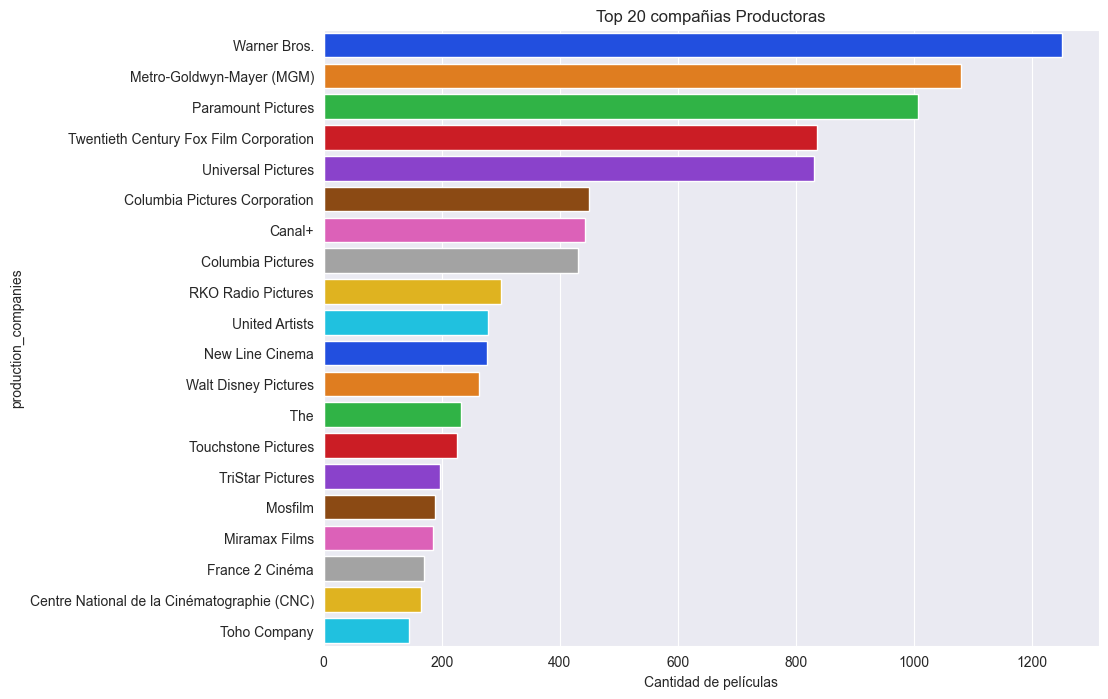

In [63]:
# Gráfico de barras para mostrar la distribución de géneros
# Crear una paleta de colores pasteles personalizada
paleta = sns.color_palette('bright')
# paleta = sns.color_palette("Spectral")
plt.figure(figsize=(10, 8))
sns.barplot(x=top_20.values, y=top_20.index, palette=paleta)
plt.xlabel('Cantidad de películas')
plt.ylabel(nom_col)
plt.title('Top 20 compañias Productoras')
plt.show()


En algunos casos los usuarios tienen mayor gusto sobre las compañias productoras, por ello se podría considerar, sin embargo, 
esta columna presenta datos erroneos dado que en el gráfico se puede notar como hay palabras que no figuran hacia alguna compañia en específico como 'The'
'Media' por ello no es util para el sistema de recomendación ademas de que existen valores y simbolos extraños, aunque algunas de las compañias si reflejan 
los datos correctos.

No recomendable para realizar modelo

---

Variable Actores
---

In [64]:
df_transformed.columns

Index(['belongs_to_collection', 'budget', 'genres', 'id', 'original_language',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'title', 'vote_average', 'vote_count',
       'release_year', 'return', 'director', 'actor_names'],
      dtype='object')

In [65]:
nom_col = 'actor_names'
df_transformed = df.copy()
df_transformed[nom_col]


0        [Tom Hanks, Tim Allen, Don Rickles, Jim Varney...
1        [Robin Williams, Jonathan Hyde, Kirsten Dunst,...
2        [Walter Matthau, Jack Lemmon, Ann-Margret, Sop...
3        [Whitney Houston, Angela Bassett, Loretta Devi...
4        [Steve Martin, Diane Keaton, Martin Short, Kim...
                               ...                        
45449    [Patrick Bergin, Uma Thurman, David Morrissey,...
45450    [Angel Aquino, Perry Dizon, Hazel Orencio, Joe...
45451    [Erika Eleniak, Adam Baldwin, Julie du Page, J...
45452    [Iwan Mosschuchin, Nathalie Lissenko, Pavel Pa...
45453                                                   []
Name: actor_names, Length: 45454, dtype: object

In [66]:
# Paciencia duracion de 15 min
df_actors, dict_actors = frecuencia_en_columna_opt(df_transformed, nom_col)

In [67]:
df_actors

Keun-mo Yoon       1
Marleta Giles      1
David Chow         4
Martine Erhel      2
Danielle Benton    1
                  ..
Paul Kennington    2
Çağan Irmak        1
Damir Markovina    1
Lonnie James       1
Jahn Pedersen      1
Length: 200944, dtype: int64

In [68]:
df_actors = pd.Series(dict_actors).sort_values(ascending=False)

In [69]:
top30_actors = df_actors.head(30)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_2968\2615146834.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top30_actors.values, y=top30_actors.index, palette=paleta)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_2968\2615146834.py:6: UserWarning: 
The palette list has fewer values (10) than needed (30) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=top30_actors.values, y=top30_actors.index, palette=paleta)


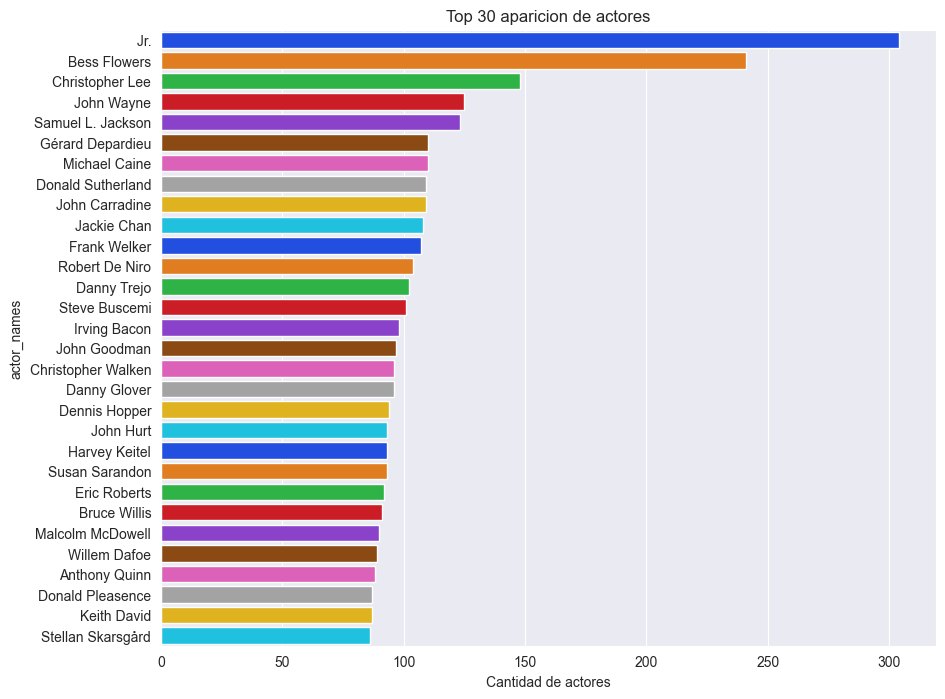

In [70]:
# Gráfico de barras para mostrar la distribución de géneros
# Crear una paleta de colores pasteles personalizada
paleta = sns.color_palette('bright')
# paleta = sns.color_palette("Spectral")
plt.figure(figsize=(10, 8))
sns.barplot(x=top30_actors.values, y=top30_actors.index, palette=paleta)
plt.xlabel('Cantidad de actores')
plt.ylabel(nom_col)
plt.title('Top 30 aparicion de actores')
plt.show()

Variable Overview
---
---

In [71]:
nom_col = 'overview'
df_transformed = df.copy()
df_transformed[nom_col]

0        Led by Woody, Andy's toys live happily in his ...
1        When siblings Judy and Peter discover an encha...
2        A family wedding reignites the ancient feud be...
3        Cheated on, mistreated and stepped on, the wom...
4        Just when George Banks has recovered from his ...
                               ...                        
45449    Yet another version of the classic epic, with ...
45450    An artist struggles to finish his work while a...
45451    When one of her hits goes wrong, a professiona...
45452    In a small town live two brothers, one a minis...
45453    50 years after decriminalisation of homosexual...
Name: overview, Length: 45454, dtype: object

In [72]:
df_transformed[nom_col].info()

<class 'pandas.core.series.Series'>
RangeIndex: 45454 entries, 0 to 45453
Series name: overview
Non-Null Count  Dtype 
--------------  ----- 
44513 non-null  object
dtypes: object(1)
memory usage: 355.2+ KB


In [73]:
# Elimina filas con valores nulos o faltantes
df_transformed = df_transformed.dropna(subset=[nom_col])


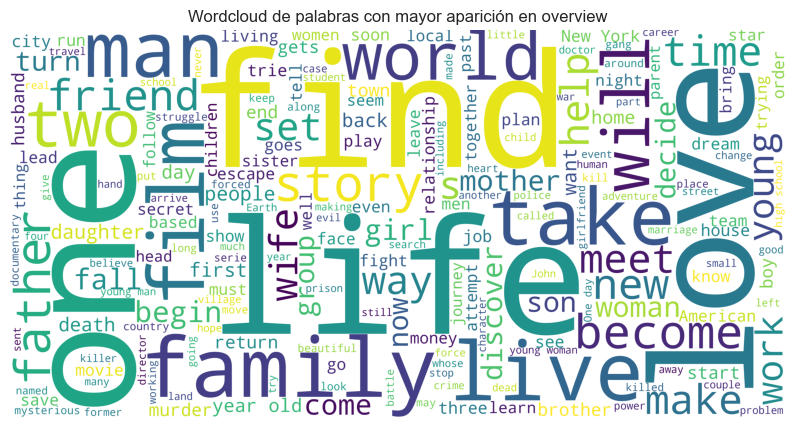

In [74]:
concatenate = ' '.join(df_transformed['overview'])
wordcloud = WordCloud(stopwords = STOPWORDS, height=2000, width=4000, background_color = 'white').generate(concatenate)
plt.figure(figsize = (10,8))
plt.imshow(wordcloud)
plt.title('Wordcloud de palabras con mayor aparición en overview')
plt.axis('off')
plt.show()

La columna overview es muy util para recomendar peliculas ya que describe lo que sucede en cada filmación, 
la recomendación mediante este tipo de datos ssuele hacerse mediante comparativa de aparicion de palabras similares 
en peliculas diferentes, po lo que esta pordía ser una buena opcion para el sistema de ML

---

Analisis de películas a través del tiempo
---


In [75]:
df_transformed['release_year']


0        1995
1        1995
2        1995
3        1995
4        1995
         ... 
45449    1991
45450    2011
45451    2003
45452    1917
45453    2017
Name: release_year, Length: 44513, dtype: int32

In [76]:
# Agrupacion de años por rangos de 10 años
df_transformed['year_group'] = (df_transformed['release_year'] // 10) * 10
# Categorizacion y orden del grupo de datos
df_transformed['year_group'] = pd.Categorical(df_transformed['year_group'], ordered=True)
# Se guardan los datos en un dataframe 
df_hist = df_transformed['year_group'].value_counts().sort_index()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_2968\3565854198.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_hist.index, y=df_hist.values, palette='Pastel2')


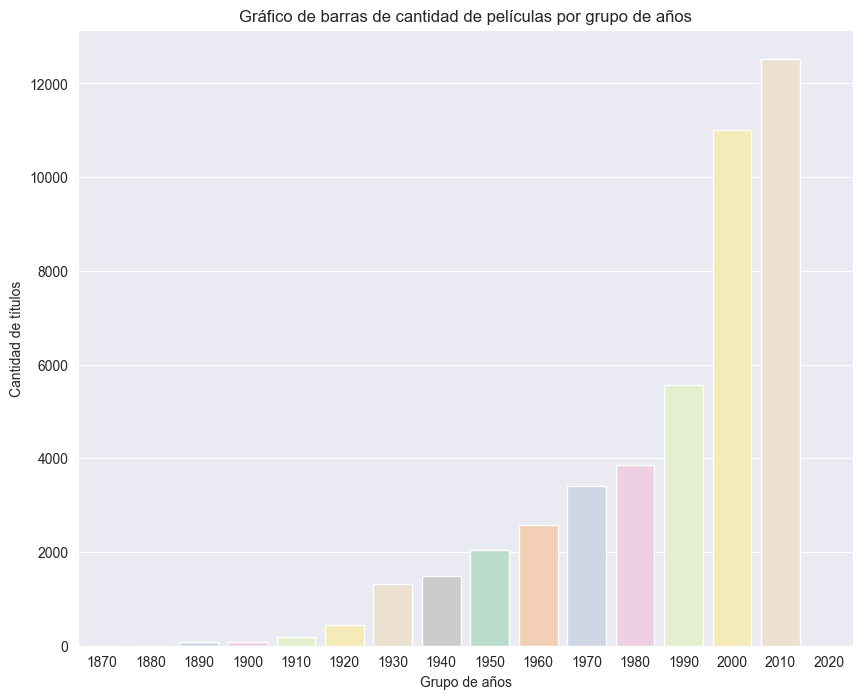

In [77]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 8))
sns.barplot(x=df_hist.index, y=df_hist.values, palette='Pastel2')
plt.xlabel('Grupo de años')
plt.ylabel('Cantidad de títulos')
plt.title('Gráfico de barras de cantidad de películas por grupo de años')
plt.show()


Correlación de variables numéricas
---



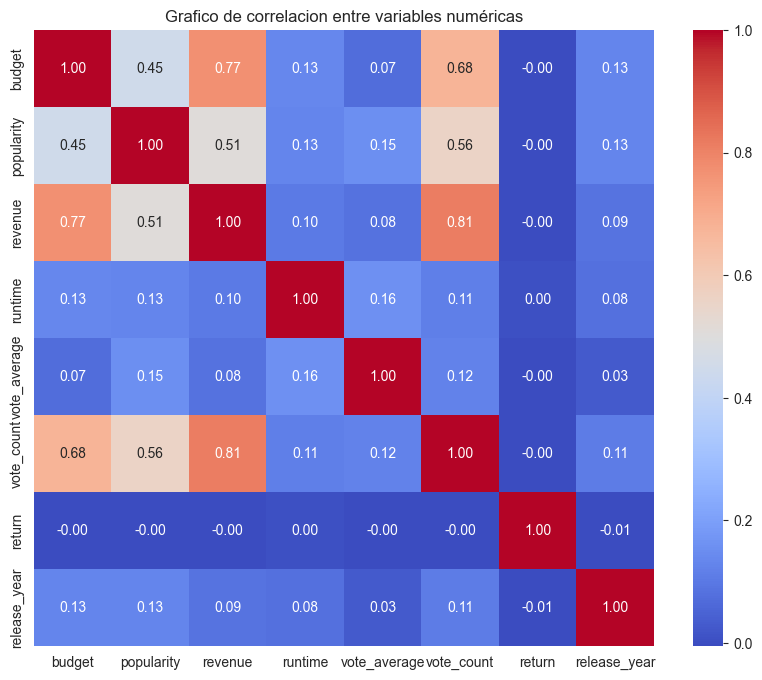

In [78]:
columnas = ['budget','popularity','revenue','runtime','vote_average','vote_count', 'return', 'release_year']
df_corr = df[columnas]
corr_matrix = df_corr.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Grafico de correlacion entre variables numéricas')
plt.show()

----

array([[<Axes: xlabel='budget', ylabel='budget'>,
        <Axes: xlabel='popularity', ylabel='budget'>,
        <Axes: xlabel='revenue', ylabel='budget'>,
        <Axes: xlabel='runtime', ylabel='budget'>,
        <Axes: xlabel='vote_average', ylabel='budget'>,
        <Axes: xlabel='vote_count', ylabel='budget'>,
        <Axes: xlabel='return', ylabel='budget'>,
        <Axes: xlabel='release_year', ylabel='budget'>],
       [<Axes: xlabel='budget', ylabel='popularity'>,
        <Axes: xlabel='popularity', ylabel='popularity'>,
        <Axes: xlabel='revenue', ylabel='popularity'>,
        <Axes: xlabel='runtime', ylabel='popularity'>,
        <Axes: xlabel='vote_average', ylabel='popularity'>,
        <Axes: xlabel='vote_count', ylabel='popularity'>,
        <Axes: xlabel='return', ylabel='popularity'>,
        <Axes: xlabel='release_year', ylabel='popularity'>],
       [<Axes: xlabel='budget', ylabel='revenue'>,
        <Axes: xlabel='popularity', ylabel='revenue'>,
        <Axes: x

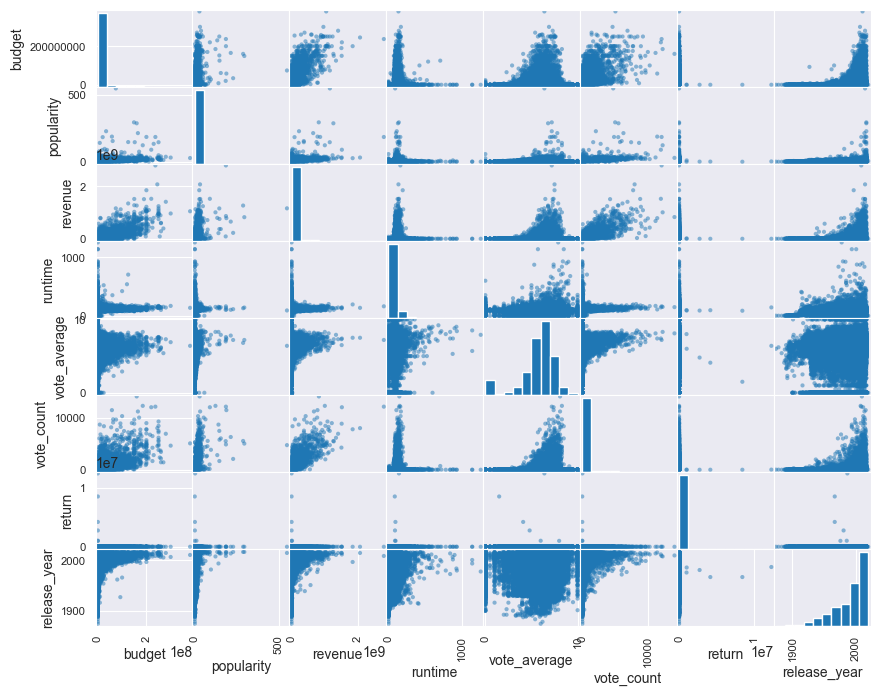

In [79]:
pd.plotting.scatter_matrix(df_corr, figsize=(10, 8),)

<Figure size 1000x800 with 0 Axes>

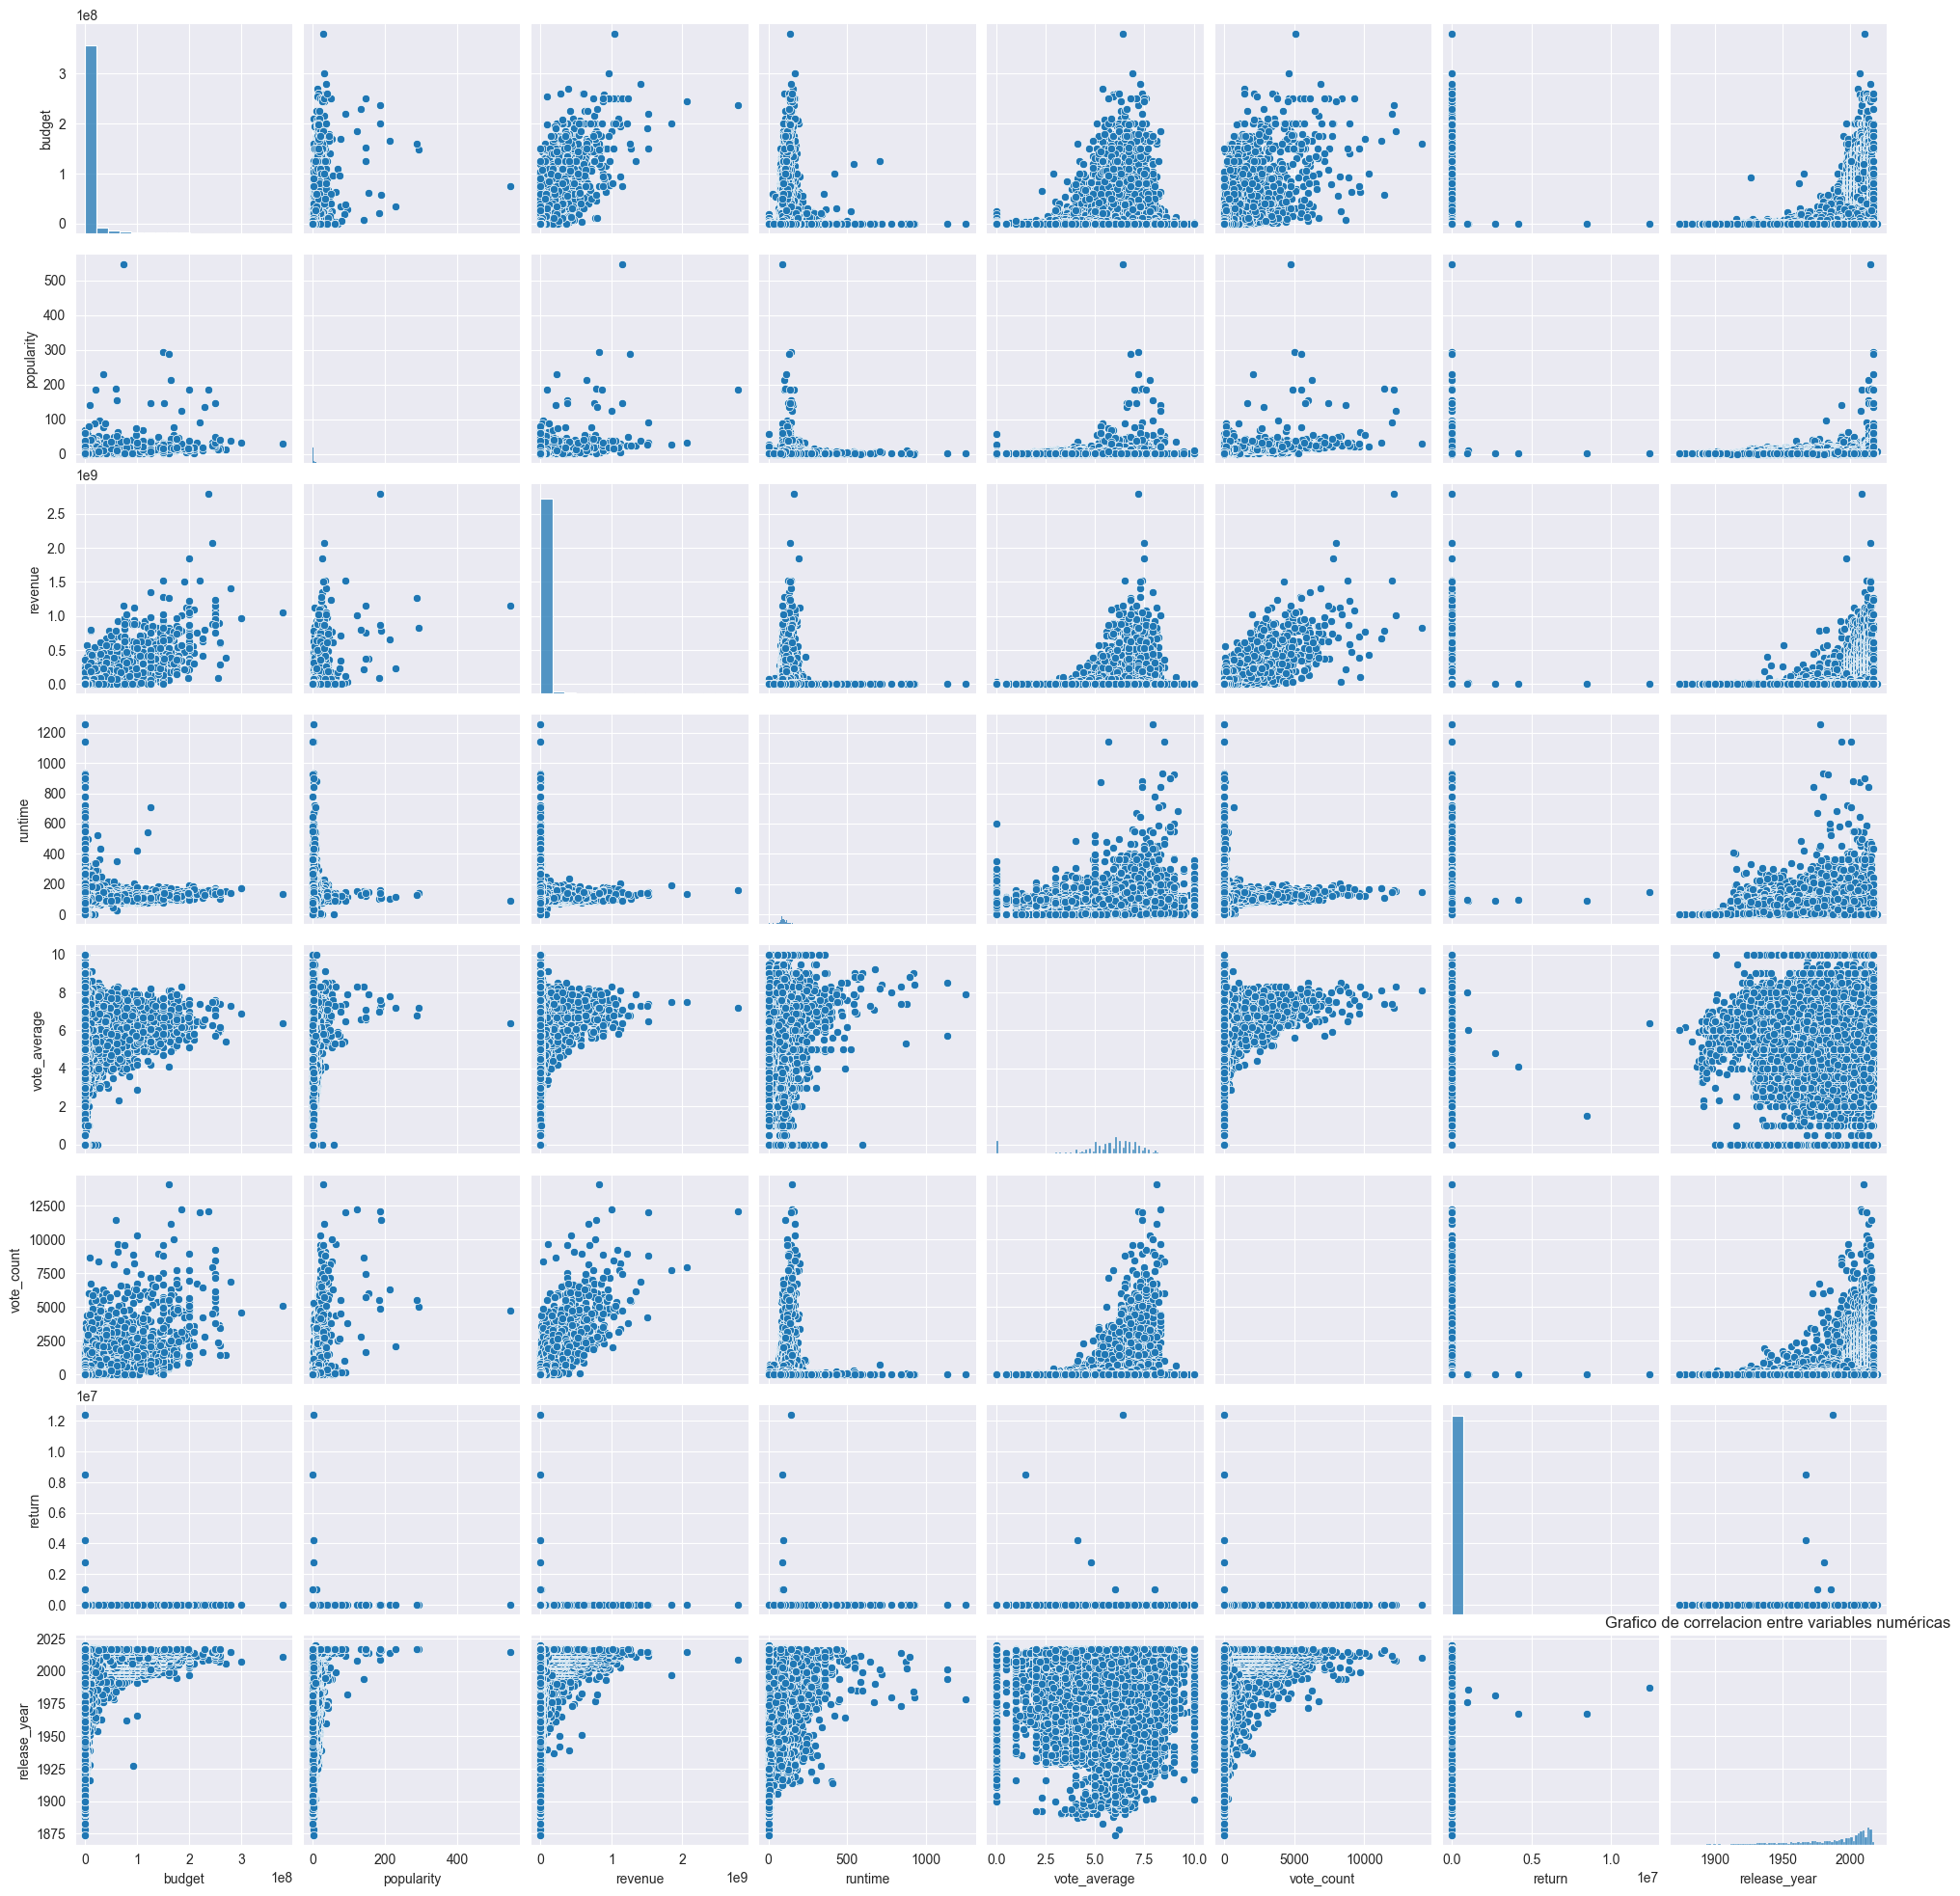

In [80]:
# Crear una matriz de dispersión para el conjunto de datos "tips"
plt.figure(figsize=(10, 8))
sns.pairplot(data=df_corr)
plt.title('Grafico de correlacion entre variables numéricas')
plt.show()

El grafico de correlaciones muestra que existe una fuerte correlacion entre ganacia y conteo de votos, esto significa que a mayor ganancia, mayor votacion en una pelicula

Otra correlacion fuerte es entre la variable ganancia y presupuesto de una pelicula

Seguido de conteo de votos con presupuesto

En ese mismo orden, popularidad tiene fuerte correlacion con conteo de votos y con ganancias

Seguido de popularidad con presupuesto

In [25]:
# Columnas del dataset
df_transformed.columns

Index(['belongs_to_collection', 'budget', 'genres', 'id', 'original_language',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'title', 'vote_average', 'vote_count',
       'release_year', 'return', 'director', 'actor_names'],
      dtype='object')

In [26]:
# Eliminar filas con datos nulos en 'overview'
df_transformed = df_transformed.dropna(subset=['overview'])

# Asegurarse de que la columna 'overview' sea de tipo string
df_transformed['overview'] = df_transformed['overview'].astype(str)

In [41]:
# columnas a guardar
columnas = ['genres', 'overview', 'popularity', 'production_companies',
       'production_countries', 'title', 'vote_average', 'vote_count',
       'release_year', 'director', 'actor_names']
# Dataframe a guardar con 5k datos
df_to_save = df_transformed[columnas].head(5000)

df_to_save.to_parquet('../Data/dataset_movies_to_ML.parquet', compression='brotli')

In [39]:
df_to_save

,genres,overview,popularity,production_companies,production_countries,title,vote_average,vote_count,release_year,director,actor_names
0,"[Animation, Comedy, Family]","Led by Woody, Andy's toys live happily in his ...",21.95,[Pixar Animation Studios],[United States of America],Toy Story,7.70,5415,1995,[John Lasseter],"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney..."
1,"[Adventure, Fantasy, Family]",When siblings Judy and Peter discover an encha...,17.02,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],Jumanji,6.90,2413,1995,[Joe Johnston],"[Robin Williams, Jonathan Hyde, Kirsten Dunst,..."
2,"[Romance, Comedy]",A family wedding reignites the ancient feud be...,11.71,"[Warner Bros., Lancaster Gate]",[United States of America],Grumpier Old Men,6.50,92,1995,[Howard Deutch],"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop..."
3,"[Comedy, Drama, Romance]","Cheated on, mistreated and stepped on, the wom...",3.86,[Twentieth Century Fox Film Corporation],[United States of America],Waiting to Exhale,6.10,34,1995,[Forest Whitaker],"[Whitney Houston, Angela Bassett, Loretta Devi..."
4,[Comedy],Just when George Banks has recovered from his ...,8.39,"[Sandollar Productions, Touchstone Pictures]",[United States of America],Father of the Bride Part II,5.70,173,1995,[Charles Shyer],"[Steve Martin, Diane Keaton, Martin Short, Kim..."
...,...,...,...,...,...,...,...,...,...,...,...
6018,"[Comedy, Drama]","Political double-talk, dirty tricks, hidden mi...",2.14,"[Columbia Pictures Corporation, Rastar Product...",[United States of America],Wrong Is Right,6.00,10,1982,[Richard Brooks],"[Sean Connery, George Grizzard, Robert Conrad,..."
6019,"[Drama, Romance]","A harsh portrait of Turkey, its people and its...",1.46,"[Cactus Films, Schweizerische Radio- und Ferns...","[France, Switzerland, Turkey]",The Road,7.10,19,1982,"[Yılmaz Güney, Serif Gören]","[Tarık Akan, Halil Ergün, Şerif Sezer, Meral O..."
6020,"[Fantasy, Science Fiction]",This Italian-Turkish co-production helmed by g...,0.74,[Les Films du Diamant],"[Turkey, Italy]","Yor, the Hunter from the Future",3.80,8,1983,[Antonio Margheriti],"[Reb Brown, Corinne Cléry, Luciano Pigozzi, Lu..."
6021,[Comedy],Peyton and Barney are fun loving high school s...,3.44,"[City Films, Rose Films, Thunder Associates]",[United States of America],Zapped!,5.10,38,1982,[Robert J. Rosenthal],"[Scott Baio, Willie Aames, Robert Mandan, Feli..."
